In [2]:
import coba as cb
import numpy as np

from coba.statistics import Mean,BootstrapConfidenceInterval

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.container   import ErrorbarContainer
from matplotlib.lines       import Line2D
from matplotlib.collections import LineCollection

c1 = "#0072B2"
c2 = "#E69F00"
c3 = "#009E73"
c4 = "#56B4E9"
c5 = "#D55E00"

figsize = (8,6)
plt.rc('font',weight='normal',size=16)
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.linewidth'] = 3
cb.CobaContext.store['elinewidth'] = 2

In [ ]:
online_logs = cb.Environments.from_save("online.zip")
online      = cb.Result.from_logged_envs(online_logs.batch(8)) 
offline     = cb.Result.from_file("offline.gz")

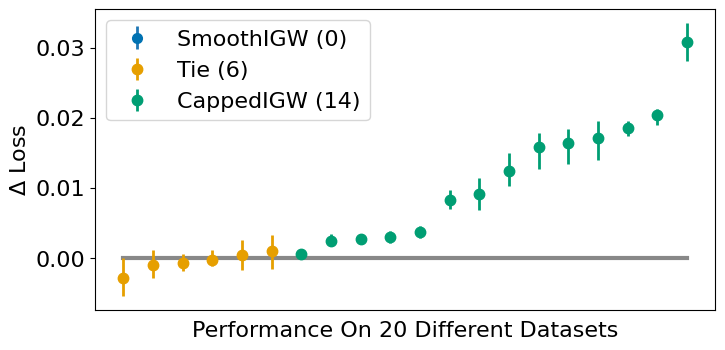

In [79]:
plt.figure(figsize=figsize)
online.filter_fin().plot_contrast(1,0,x=['openml_data','openml_task'],err=BootstrapConfidenceInterval(.9,Mean().calculate),labels=['CappedIGW','SmoothIGW'],colors=[c1,c2,c3],out=None)
plt.title("", loc='left')
plt.xticks([])
plt.xlabel('Performance On 20 Different Datasets')
plt.ylabel('$\\Delta$ Loss')

line    = Line2D([],[],marker='o',markersize=7, ls="none", color=c1)
barline = LineCollection(np.empty((0,0,0)),linewidths=(2))
err     = ErrorbarContainer((line, [], [barline]), has_xerr=False, has_yerr=True)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([err]+handles,['SmoothIGW (0)']+labels,loc='upper left')

#plt.show()
plt.savefig('online_diff.pdf',format='pdf', bbox_inches="tight")

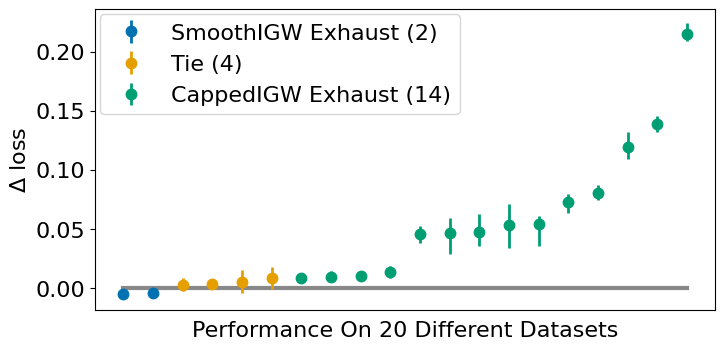

In [78]:
plt.figure(figsize=figsize)
offline.filter_fin().plot_contrast(1,0,x=['openml_data','openml_task'],err=BootstrapConfidenceInterval(.9,Mean().calculate),labels=['CappedIGW Exhaust','SmoothIGW Exhaust'],colors=[c1,c2,c3],out=None)
plt.title("", loc='left')
plt.xticks([])
plt.xlabel('Performance On 20 Different Datasets')
plt.ylabel('$\\Delta$ loss')
plt.legend(loc='upper left',bbox_to_anchor=(-.01,1.02))

#plt.show()
plt.savefig('offline_diff.pdf',format='pdf', bbox_inches="tight")

This result contains environments of different lengths. The plot only includes interactions up to the shortest environment. To supress this warning in the future call <result>.filter_fin(n_interactions) before plotting.


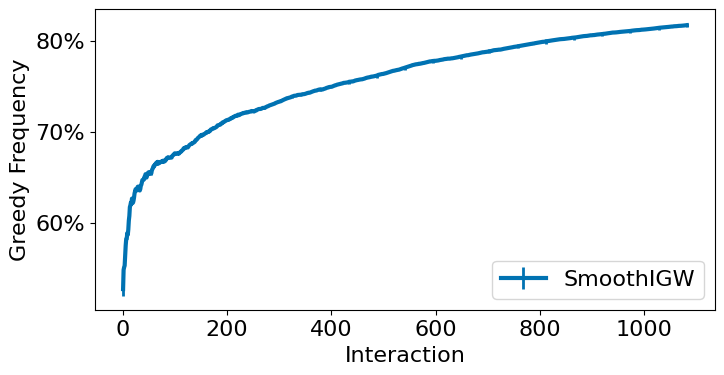

In [45]:
class prob_none_as_reward:   
    def filter(self, interactions):
        for interaction in interactions:
            new = interaction.copy()
            new['reward'] = [100 if p is None else 0 for p in new['probability']]
            yield new
            
old_exhaust  = cb.Environments([e for e in online_logs if e.params['learner']['sampler'] == 'old'])
old_none_pct = cb.Result.from_logged_envs(old_exhaust.filter(prob_none_as_reward()))

plt.figure(figsize=figsize)
old_none_pct.plot_learners(out=None,labels=['SmoothIGW'],err=BootstrapConfidenceInterval(.9,Mean().calculate),colors=[c1])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.ylabel('Greedy Frequency')
plt.title("", loc='left')
plt.legend(loc='lower right')

#plt.show()
plt.savefig('indicator_freq.pdf',format='pdf', bbox_inches="tight")